In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from scipy import stats
from pmdarima.arima import auto_arima
import math

In [3]:
data = []

df = pd.read_excel('C:/Users/katya/OneDrive/Рабочий стол/_/НГТУ/8 семестр/КМ/новые_данные.xlsx',index_col=None, header=None)
for i in range (0,len(df)):
    data.append(round(df.values[i][0],2))

data_ = pd.Series(data) # Временной ряд

In [18]:
# Определение оптимальных параметров модели ARIMA
print("Оптимальные параметры\n", auto_arima(data_))

Оптимальные параметры
  ARIMA(3,0,2)(0,0,0)[0] intercept


In [19]:
# Создаём модель ARIMA
model = ARIMA(data_, order =(3, 0, 2))
modelfit = model.fit()
#print(modelfit.summary())

C:\Users\katya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


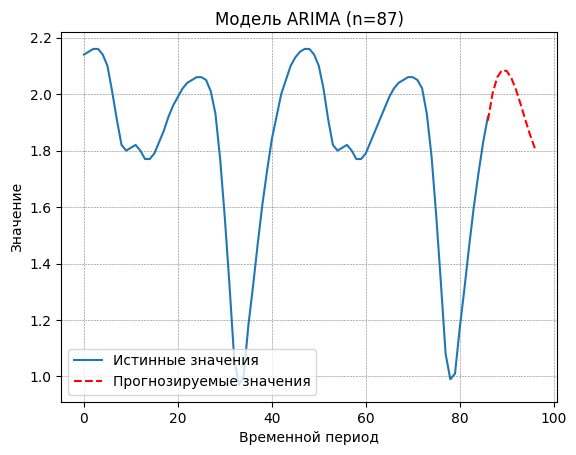

In [27]:
#predictions = modelfit.predict()
n_pred = 10 #количество прогнозируемых данных
predictions = modelfit.predict(start=len(data_)-1, end=len(data_)-1+n_pred)


# Отображение результатов на графике
plt.plot(data_, label='Истинные значения')
plt.plot(predictions, "--", color='red', label='Прогнозируемые значения')
plt.xlabel('Временной период')
plt.ylabel('Значение')
plt.title('Модель ARIMA (n={})'.format(n_train))
plt.grid(True, linestyle='--', linewidth=0.4, color='gray')

plt.legend(loc=3)
plt.show()